In [7]:
#Importing the libraries
import numpy as np 
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [69]:
# Creation of test data 
rng = np.random.RandomState(1)
x = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca1 = PCA(n_components=2,whiten =True)
pca1.fit(x)
# Explained Variance Ratio
print(pca.explained_variance_)
print (pca.n_components_)
print(pca.components_)

[0.7625315 0.0184779]
2
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


[Text(0, 0.5, 'PC2:2.37%'),
 Text(0.5, 0, 'PC1:97.63%'),
 Text(0.5, 1.0, 'Principle component')]

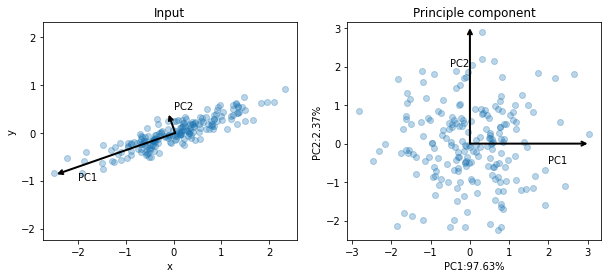

In [70]:
fig,ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].scatter (X[:,0],X[:,1], alpha=0.3)

def drawVector(v0,v1,ax):
  ax = ax
  arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
  ax.annotate('',v1,v0,arrowprops=arrowprops)

for length, vector in zip (pca.explained_variance_, pca.components_):
  v = vector * 3 * np.sqrt(length)
  drawVector(pca.mean_,pca.mean_+v,ax=ax[0])
ax[0].axis('equal')
ax[0].text(-2,-1,"PC1")
ax[0].text(0,0.5,"PC2")
ax[0].set(xlabel='x', ylabel='y', title='Input')

#Ploting the Principle component
x_new = pca1.transform(x)
ax[1].scatter (x_new[:,0],x_new[:,1], alpha=0.3)
drawVector([0, 0], [0, 3], ax=ax[1])
drawVector([0, 0], [3, 0], ax=ax[1])
ax[1].text(-0.5,2,"PC2")
ax[1].text(2,-0.5,"PC1")
ax[1].set(xlabel=f'PC1:{round(pca1.explained_variance_ratio_[0]*100,2)}%', 
          ylabel=f'PC2:{round(pca1.explained_variance_ratio_[1]*100,2)}%', 
          title='Principle component')

In [ ]:

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)
X = mnist["data"]
y = mnist["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [87]:
# Choosing the Right Number of Dimensions
pca2 = PCA()
pca2.fit(X_train)
cumsum = np.cumsum(pca2.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)
pca = PCA(n_components=d)
X_reduced = pca2.fit_transform(X)

# Elbow curve where the explained variance stops growing fast.



154


Text(170, 0.6, 'Total Dimention=784\n\nRight Dimension=154\nwith 95.0variance explained')

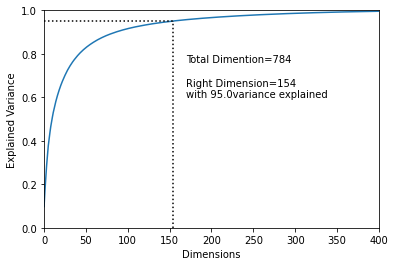

In [112]:
plt.plot(cumsum)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.text(170,0.60,f"Total Dimention={len(cumsum)}\n\nRight Dimension={d}\nwith {round(cumsum[d],2)*100}variance explained")

784